
   
# Title: Wisconsin Breast Cancer Database (January 8, 1991)

This breast cancer databases was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg. If you publish results when using this database, then please include this information in your acknowledgements.

### Relevant Information:

Samples arrive periodically as Dr. Wolberg reports his clinical cases.
The database therefore reflects this chronological grouping of the data.
This grouping information appears immediately below, having been removed from the data itself:

     Group 1: 367 instances (January 1989)
     Group 2:  70 instances (October 1989)
     Group 3:  31 instances (February 1990)
     Group 4:  17 instances (April 1990)
     Group 5:  48 instances (August 1990)
     Group 6:  49 instances (Updated January 1991)
     Group 7:  31 instances (June 1991)
     Group 8:  86 instances (November 1991)
     -----------------------------------------
     Total:   699 points (as of the donated datbase on 15 July 1992)


#### Number of Instances: 699 (as of 15 July 1992)

#### Number of Attributes: 10 plus the class attribute

#### Attribute Information: (class attribute has been moved to last column)

         Attribute                        Domain

       1. Sample code number             id number
       2. Clump Thickness                1 - 10
       3. Uniformity of Cell Size        1 - 10
       4. Uniformity of Cell Shape       1 - 10
       5. Marginal Adhesion              1 - 10
       6. Single Epithelial Cell Size    1 - 10
       7. Bare Nuclei                    1 - 10
       8. Bland Chromatin                1 - 10
       9. Normal Nucleoli                1 - 10
      10. Mitoses                        1 - 10
      11. Class:                        (2 for benign, 4 for malignant)

#### Missing attribute values: 16

There are 16 instances in Groups 1 to 6 that contain a single missing (i.e., unavailable) attribute value, now denoted by "?".  
#### Class distribution:
 
    Benign: 458 (65.5%)
    Malignant: 241 (34.5%)

In [132]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
#from sklearn.preprocessing import StandardScaler

### Breast Cancer Wisconsin (Original) Data Set from the UCI Machine Learning Repository

In [133]:
# chargement des données
dataset = pd.read_table('breast-cancer-wisconsin.data', sep = ',')

In [134]:
df = dataset.copy()

The dataset must have 699 lines et 11 columns

In [135]:
df.index #Describe index

RangeIndex(start=0, stop=698, step=1)

In [136]:
df.shape #(rows,columns)

(698, 11)

In [137]:
# Rename columns
df.columns = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei', 'Bland Chromatin','Normal Nucleoli', 'Mitoses', 'Class']

In [138]:
df.columns #Describe DataFrame columns

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [139]:
df.count() #Number of non-NA values

Sample code number             698
Clump Thickness                698
Uniformity of Cell Size        698
Uniformity of Cell Shape       698
Marginal Adhesion              698
Single Epithelial Cell Size    698
Bare Nuclei                    698
Bland Chromatin                698
Normal Nucleoli                698
Mitoses                        698
Class                          698
dtype: int64

### Handling the missing data

In [140]:
MissingValues = {col:df[df[col] == "?"].shape[0] for col in df.columns}
MissingValues

{'Sample code number': 0,
 'Clump Thickness': 0,
 'Uniformity of Cell Size': 0,
 'Uniformity of Cell Shape': 0,
 'Marginal Adhesion': 0,
 'Single Epithelial Cell Size': 0,
 'Bare Nuclei': 16,
 'Bland Chromatin': 0,
 'Normal Nucleoli': 0,
 'Mitoses': 0,
 'Class': 0}

In [141]:
import numpy as np
for i in range(df.shape[1]):
    for j in range(df.shape[0]):
        if(df.iloc[j,i]=='?'):
            df.iloc[j,i]=np.NaN

In [142]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [143]:
df = df.fillna(df.median())

In [144]:
df.isnull().sum() #Number of NA values

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

### Summary

In [145]:
df.info() #Info on DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           698 non-null    int64 
 1   Clump Thickness              698 non-null    int64 
 2   Uniformity of Cell Size      698 non-null    int64 
 3   Uniformity of Cell Shape     698 non-null    int64 
 4   Marginal Adhesion            698 non-null    int64 
 5   Single Epithelial Cell Size  698 non-null    int64 
 6   Bare Nuclei                  698 non-null    object
 7   Bland Chromatin              698 non-null    int64 
 8   Normal Nucleoli              698 non-null    int64 
 9   Mitoses                      698 non-null    int64 
 10  Class                        698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


    # : number of functions in the data framework
    Column: Features header in the Dataframe
    Non-null Count: Counter of nonzero values for each Dataframe function
    Type: type of data stored for each function of the data frame

In [146]:
df.head(5)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [147]:
df.describe() #Statistical summary of DataFrame

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,3.438395,2.869628,1.590258,2.690544
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,2.440056,3.055004,1.716162,0.951596
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


    count: number of examples counted for the selected function
    mean: arithmetic mean for the selected function
    std: standard deviation for the selected function
    min: minimum value presented by the examples for the selected function
    25%: first quartile calculated on the examples for the selected function
    50%: second quartile calculated on the examples for the selected function
    75%: third quartile calculated on examples for selected feature
    max: maximum value presented by the examples for the selected function

### Visualizing the data

2    457
4    241
Name: Class, dtype: int64


<AxesSubplot:xlabel='Class', ylabel='count'>

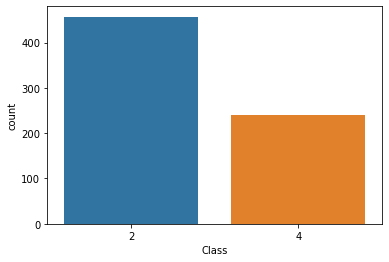

In [148]:
print(df['Class'].value_counts())
sns.countplot(x="Class", data=df)

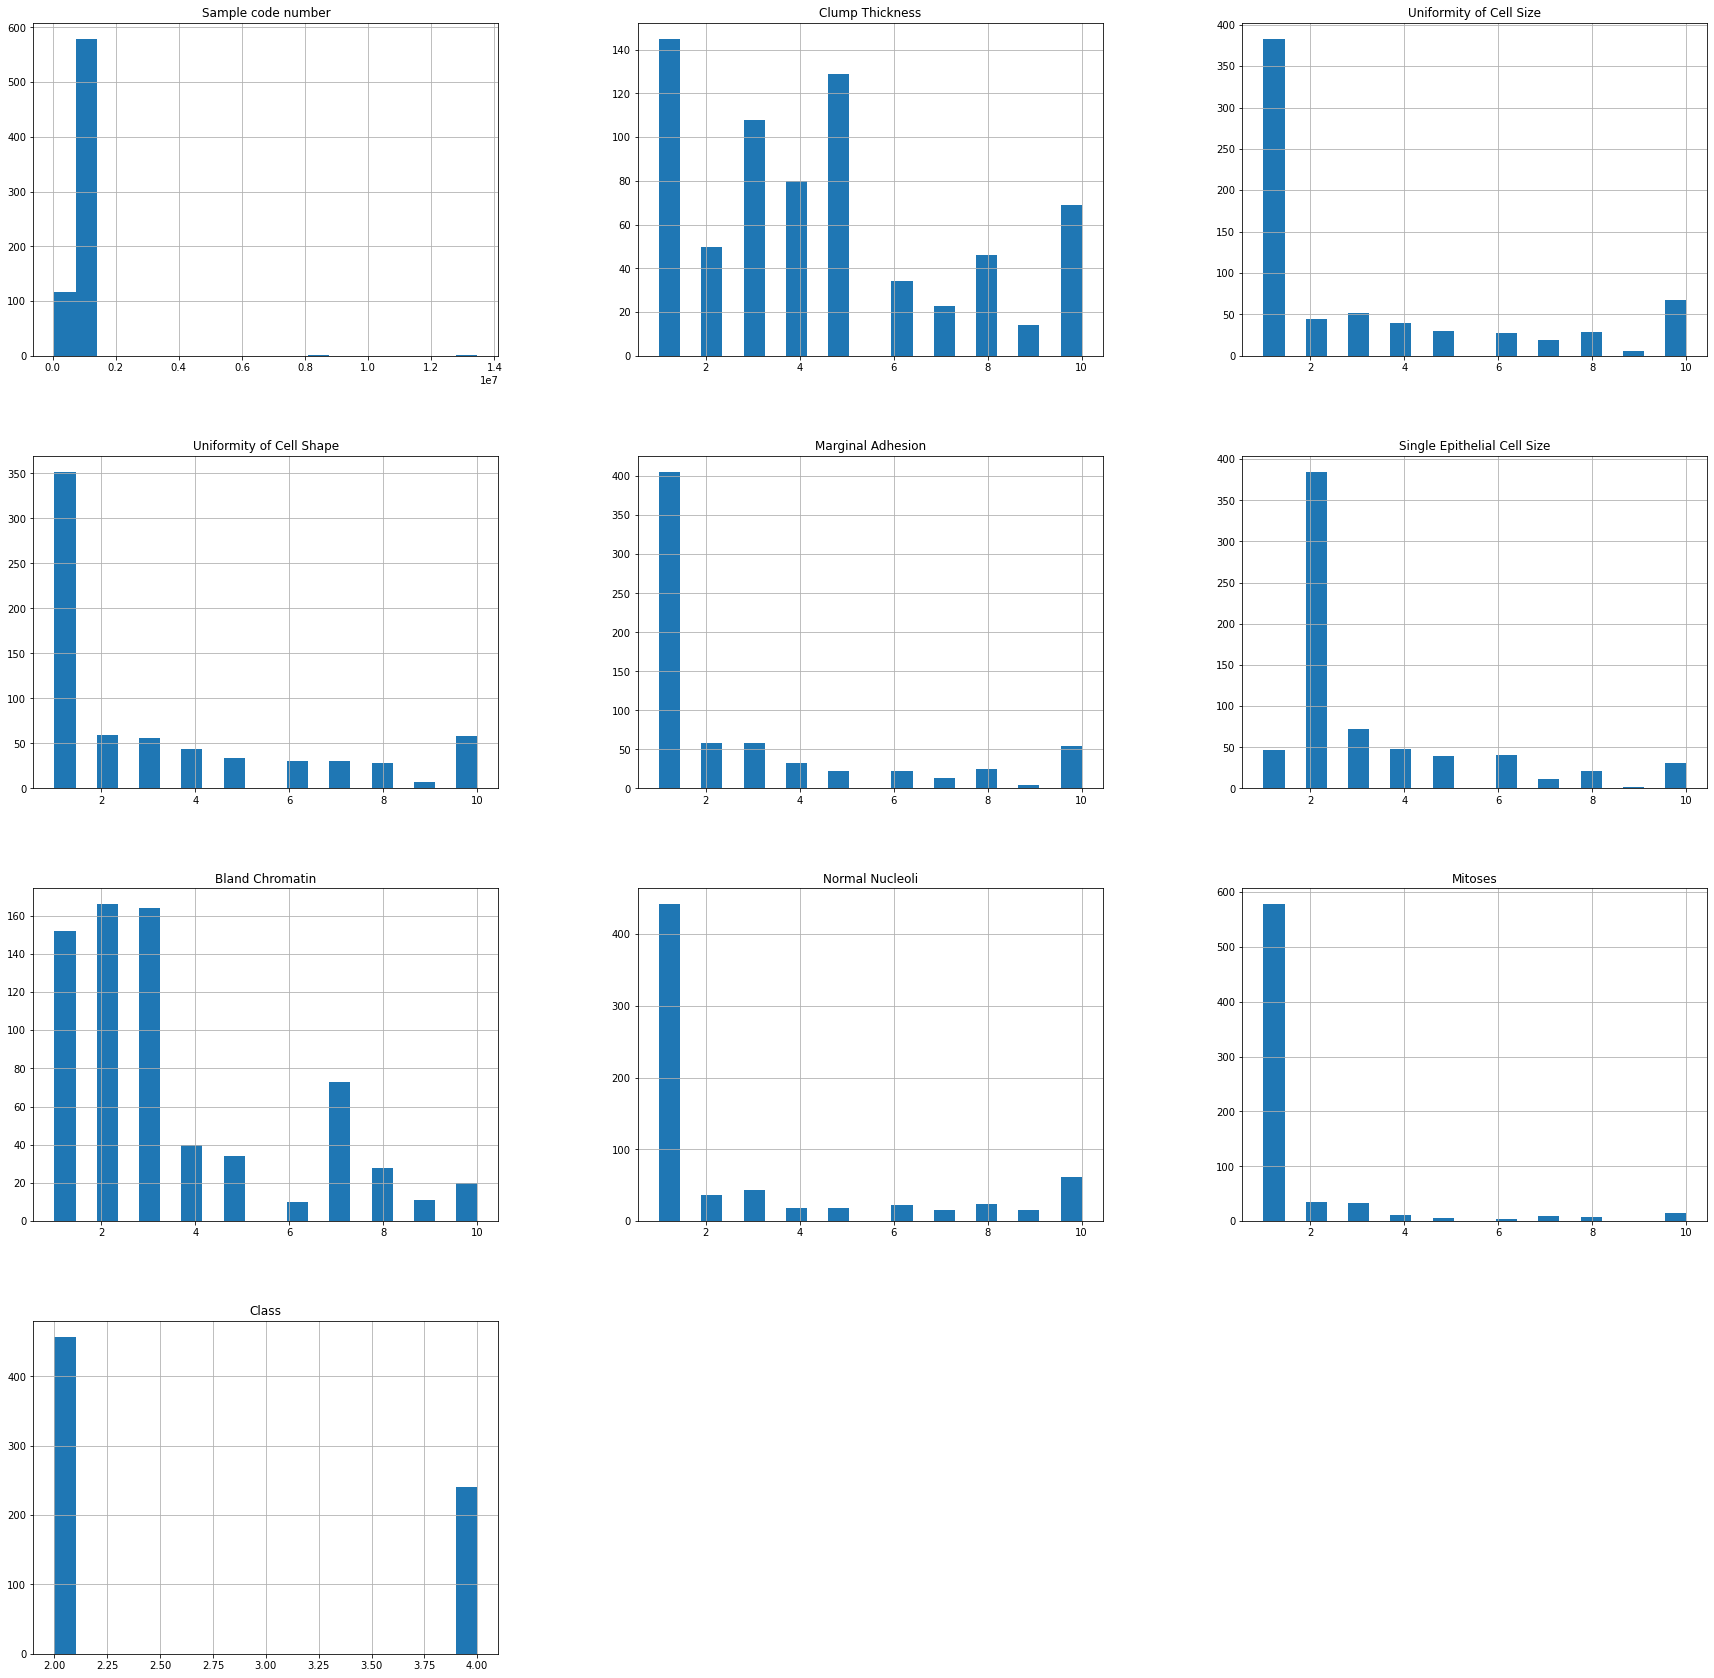

In [149]:
df.hist(bins=20, figsize=(30,30));

<Figure size 432x432 with 0 Axes>

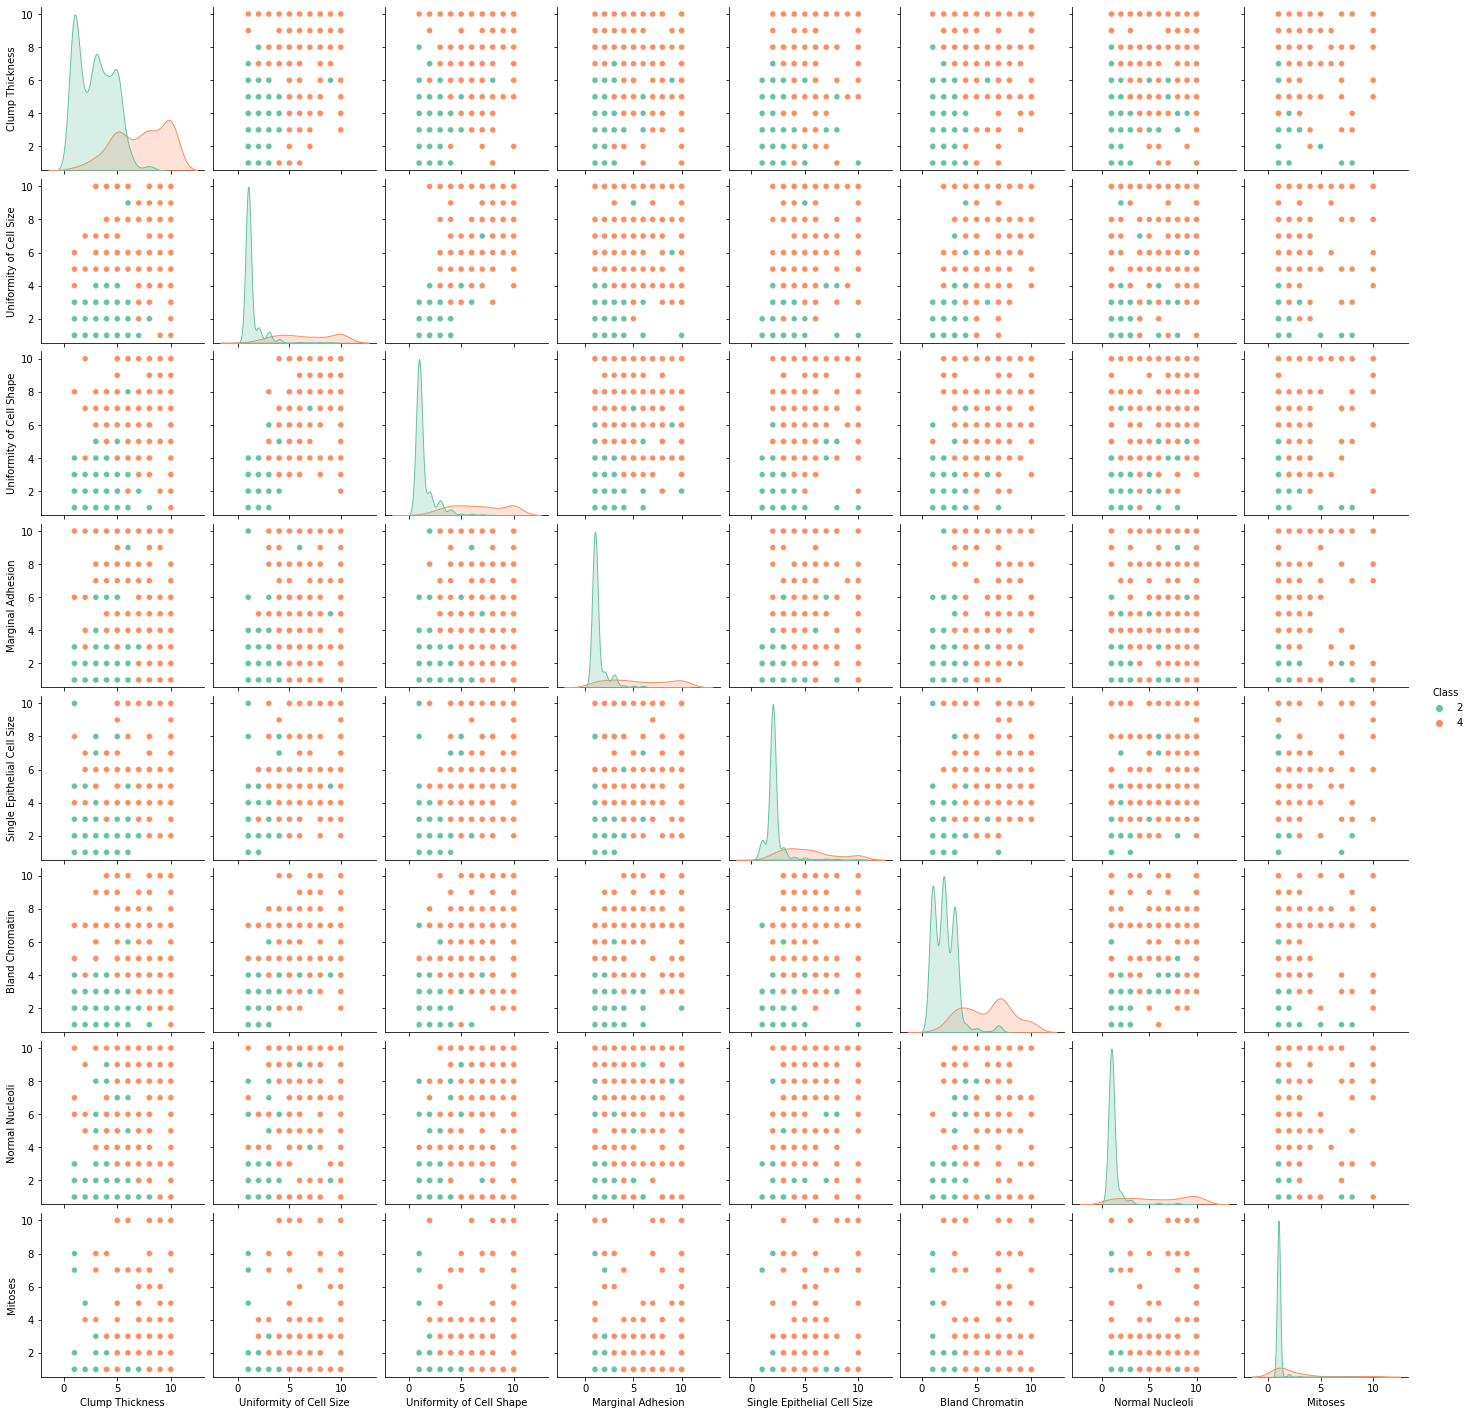

In [150]:
fig1 = plt.figure(figsize=(6,6))
sns.pairplot(df.iloc[:,1:],hue='Class',palette='Set2')

<AxesSubplot:>

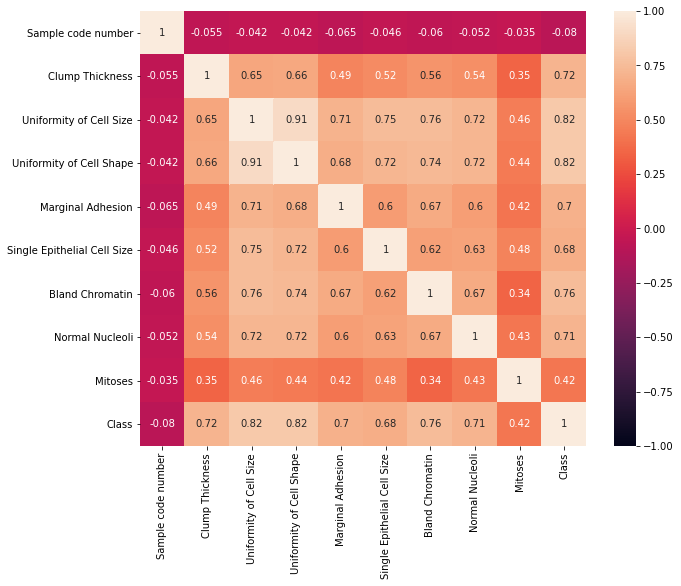

In [151]:
fig2 = plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,vmax=1.0,vmin=-1.0)

In order to perform a complete analysis, the correlation matrix takes into account the different characteristics present in the Dataframe.

The values present in the correlation matrix must be expressed as a decimal value in the range [-1,+1] indicating an inverse correlation or a direct correlation respectively.

When the calculated value of the correlation is close to the value 0, it is not possible to define the correlation between the characteristics considered.

### Preprare and pre-process the data

Due to the presence of data expressed over a different numerical range, standardization must be performed using the appropriate Standardscaler() method.

Due to the presence of data expressed with similar numerical range, normalization must be performed, we will be using the MinMaxScaler() method.

In [152]:
names = df.columns

# Data Normalization
scaler = preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(df)

# Data Standardization
#scaler = StandardScaler()
#scaled = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled, columns=names)

In [153]:
scaled_df.head(20)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0.070285,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.000000,0.0
1,0.071217,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.000000,0.0
2,0.071281,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.000000,0.0
3,0.071336,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.000000,0.0
4,0.071344,0.777778,1.000000,1.000000,0.777778,0.666667,1.000000,0.888889,0.666667,0.000000,1.0
5,0.071417,0.000000,0.000000,0.000000,0.000000,0.111111,1.000000,0.222222,0.000000,0.000000,0.0
6,0.071451,0.111111,0.000000,0.111111,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000,0.0
7,0.072535,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.444444,0.0
8,0.072535,0.333333,0.111111,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000,0.0
9,0.072700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.000000,0.000000,0.0


In [154]:
X = scaled_df.iloc[:,:10]
y = scaled_df.iloc[:,10:]

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.50, random_state = 0) 

### Measuring method of clusters produced

Different Aspects of Cluster Validation:
    
    1. Determining the clustering tendency of a set of data, i.e., distinguishing whether non-random structure actually exists in the data.
    2. Determining the ‘correct’ number of clusters (e.g., Sum of Squared Error (SSE)).
    3. Extrinsic: supervised
        - Comparing the results of a cluster analysis to externally known results (entropy, precision, recall)
    4. Comparing the results of two different sets of cluster analyses to determine which is better.
        - Often an Extrinsic or Intrinsic index is used for this function (SSE or entropy)

The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

    - The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
    - Each point is closer to its own cluster center than to other cluster centers.

### K-means

#### Finding the Optimal Number of Clusters
Elbow Curve to get the right number of Clusters
A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

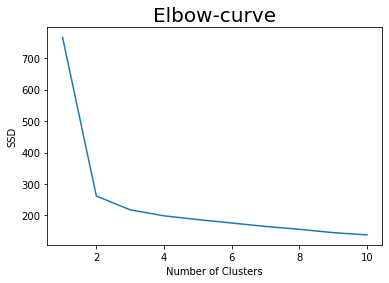

In [156]:
from sklearn.cluster import KMeans

ssd = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=698)
    kmeans.fit(scaled_df)
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(range(1, 11), ssd)
plt.title('Elbow-curve', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('SSD')
plt.show()

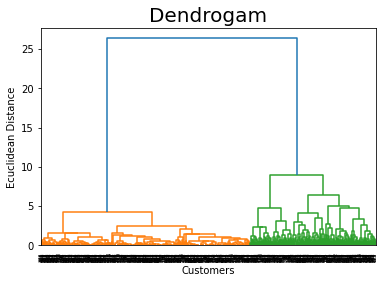

In [157]:
# Hierarchical clustering approaches

import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()